# Map rivers from the WDBII source

### Database

- [GSHHG](http://www.soest.hawaii.edu/pwessel/gshhg/index.html) (Global Self-consistent, Hierarchical, High-resolution Geography Database)

  [Homepage](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html) at NCEI (formerly the NGDC) - NOAA

  A high-resolution geography data set amalgamated from three data bases in the public domain: 
  >- World Vector Shorelines (WVS). 
  >- CIA World Data Bank II (WDBII). 
  >- Atlas of the Cryosphere (AC). 

- [WDBII](https://www.evl.uic.edu/pape/data/WDB/) (CIA World DataBank II)

  A collection of world map data, consisting of vector descriptions of land outlines, rivers, and political boundaries

Here downloads the GSHHG from [SOEST server](http://www.soest.hawaii.edu/pwessel/gshhg/index.html), data verison and format: 2.3.7 - ESRI shapefile (shp)

In [1]:
import shapefile
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from matplotlib.colors import LightSource
from mpl_toolkits.axes_grid1 import make_axes_locatable

## 1.1 Build the basemap from earth2014 model

In [2]:
dir_db   = '../data/earth2014/data_5min/topo_grids'
fname_db = 'Earth2014.TBI2014.5min.geod.bin' 
fname_save  = 'Earth2014.TBI2014.5min' 

fname_topo = os.path.join(dir_db,fname_db)

In [3]:
# This scirpt shows how to access the data grids of earth2014 model
# Source code: access_Earth2014_grids5min.m (Christian Hirt, Moritz Rexer)

# grid definitions
res_deg = 5/60 # 5min data
extent_global = [-180, 180, -90, 90]
minlon,maxlon,minlat,maxlat = extent_global
lats = np.arange((minlat+res_deg/2),(maxlat-res_deg/4),res_deg)
lons = np.arange((minlon+res_deg/2),(maxlon-res_deg/4),res_deg)
nlat = len(lats)
nlon = len(lons)
order_db = nlat
minlon1,maxlon1,minlat1,maxlat1 = (lons.min(),lons.max(),lats.min(),lats.max())
extent_earth2014 = [minlon1,maxlon1,minlat1,maxlat1]

# read data
data_topo = np.fromfile(fname_topo, dtype='>i2').reshape((nlat, nlon))
data_topo = data_topo.astype(np.int16) # data = data.astype('<i2')
data_topo = np.flipud(data_topo)

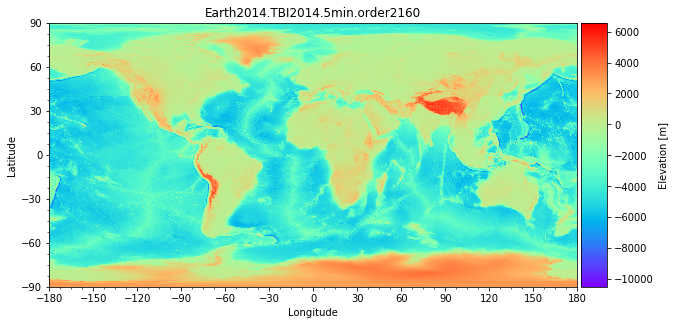

In [4]:
order_img  = order_db 
data_img   = data_topo.copy()
extent_img = extent_earth2014 #(-180, 180, -90, 90)
extent_fig = extent_global
cmap = cm.rainbow 
xticks = np.arange(-180,210,30)
yticks = np.arange(-90,120,30)
dpi    = 100
save_mode = True
fname_fig = fname_save + '.order'+ str(order_img)


fig, ax = plt.subplots(1, 1, figsize=(10,8))
im = ax.imshow(data_img, extent=extent_img,cmap=cmap)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks, xticks=xticks)
ax.minorticks_on()
ax.set_title(fname_fig)
ax.axis(extent_fig)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(im, cax=cax)
cbar.set_label('Elevation [m]')

if save_mode == True:
    plt.savefig((fname_fig+'.png'),dpi=dpi)

## 2 Plot the rivers

In GSHHG, all data sets come in 5 different resolutions:
>- f : Full resolution.  These contain the maximum resolution of this data and has not been decimated.
>- h : High resolution.  The Douglas-Peucker line reduction was used to reduce data size by ~80% relative to full.
>- i : Intermediate resolution.  The Douglas-Peucker line reduction was used to reduce data size by ~80% relative to high.
>- l : Low resolution.  The Douglas-Peucker line reduction was used to reduce data size by ~80% relative to intermediate.
>- c : Crude resolution.  The Douglas-Peucker line reduction was used to reduce data size by ~80% relative to low.

Rivers are organized into 10 classification levels:
>- L0: Double-lined rivers (river-lakes).
>- L1: Permanent major rivers.
>- L2: Additional major rivers.
>- L3: Additional rivers.
>- L4: Minor rivers.
>- L5: Intermittent rivers - major.
>- L6: Intermittent rivers - additional.
>- L7: Intermittent rivers - minor.
>- L8: Major canals.
>- L9: Minor canals.
>- L10: Irrigation canals.

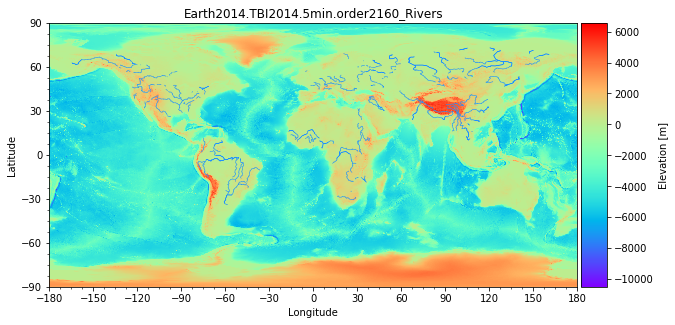

In [5]:
# river parameters
level = 2            # river database level 
resolution = "c"     # data sets resolution "fhilfc"
db_root_path = "../data/gshhg-shp-2.3.7" # input directory
db_name = 'WDBII'    # data name
tag = "river"         
format_string = "%s_%s_%s_L0%s.shp"


order_img  = order_db 
data_img   = data_topo.copy()
extent_img = extent_earth2014  
extent_fig = extent_global
cmap = cm.rainbow 
xticks = np.arange(-180,210,30)
yticks = np.arange(-90,120,30)
dpi    = 100
save_mode = True
fname_fig = fname_save + '.order'+ str(order_img)+'_Rivers'


fig, ax = plt.subplots(1, 1, figsize=(10,8))
im = ax.imshow(data_img, extent=extent_img,cmap=cmap)

levels = range(1, level + 1)
for i_level in levels:
    fname_shape = os.path.join(db_root_path, '%s_shp' % db_name,resolution, format_string % (db_name, tag, resolution, i_level))
    sf = shapefile.Reader(fname_shape)
    shapes = sf.shapes()
    for shape in shapes:
        for i_part in range(len(shape.parts)):
            i_start = shape.parts[i_part]
            if i_part==len(shape.parts)-1:
                i_end = len(shape.points)
            else:
                i_end = shape.shape.parts[i_part+1]
            x = [ii[0] for ii in shape.points[i_start:i_end]]
            y = [ii[1] for ii in shape.points[i_start:i_end]]
            ax.plot(x,y,'dodgerblue',linewidth=0.5)

ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks, xticks=xticks)
ax.minorticks_on()
ax.set_title(fname_fig)
ax.axis(extent_fig)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(im, cax=cax)
cbar.set_label('Elevation [m]')

if save_mode == True:
    plt.savefig((fname_fig+'.png'),dpi=dpi)
    
plt.show()